In [1]:
import os
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg
import splitfolders
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

2024-05-27 18:12:22.733251: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
train_path = "/Users/garvsawhney/Downloads/PlantVillage(split)/train"
val_path = "/Users/garvsawhney/Downloads/PlantVillage(split)/val"

Tomato_healthy


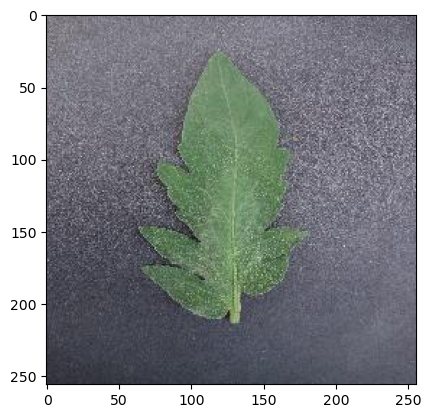

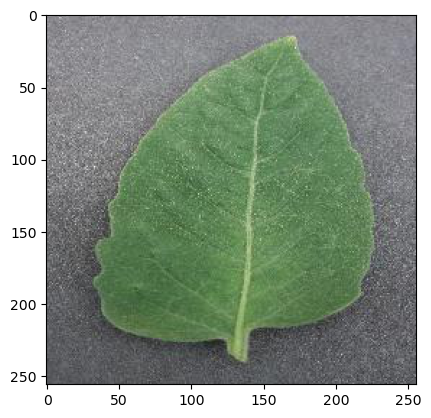

Potato___Early_blight


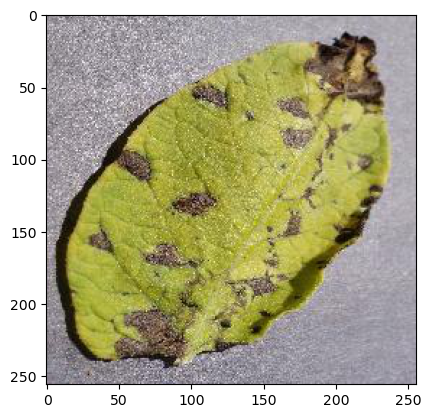

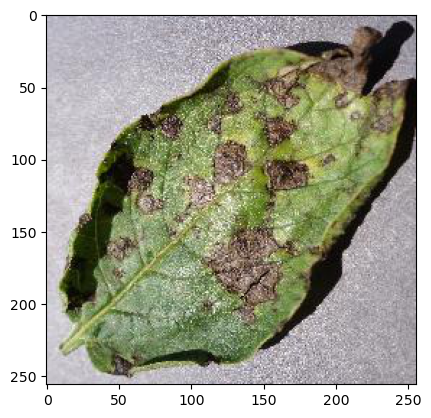

Tomato_Early_blight


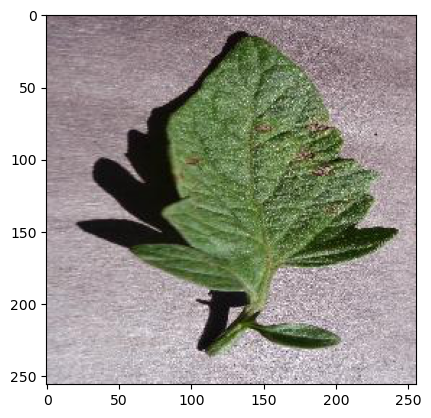

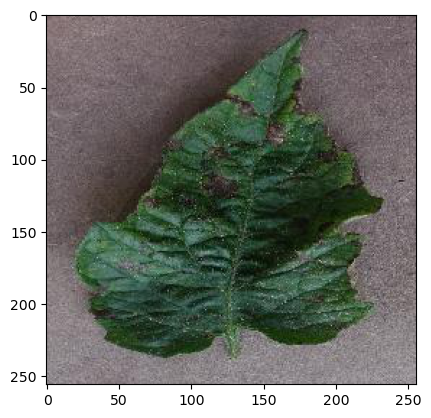

Potato___Late_blight


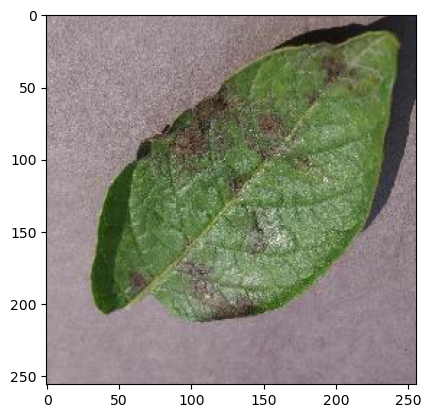

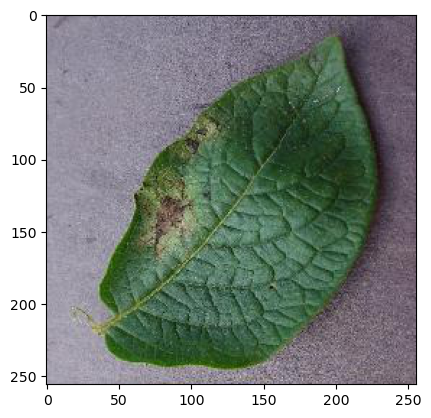

Tomato_Late_blight


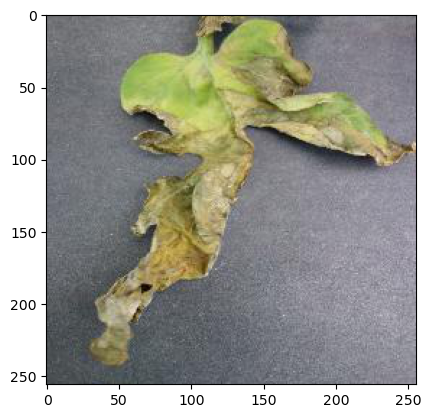

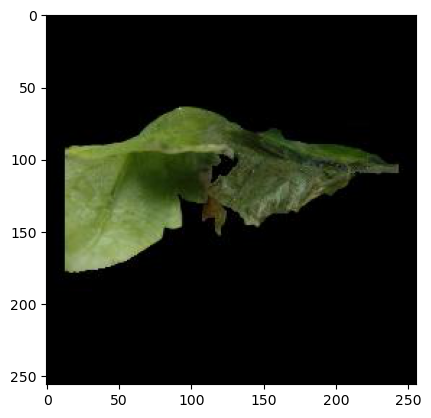

Potato___healthy


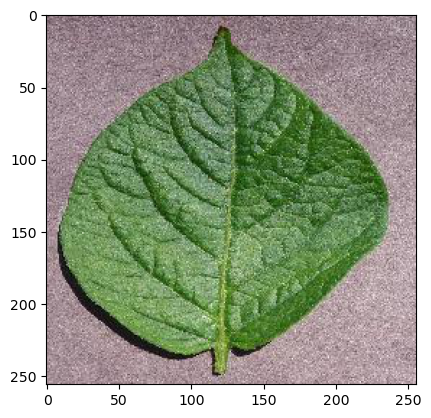

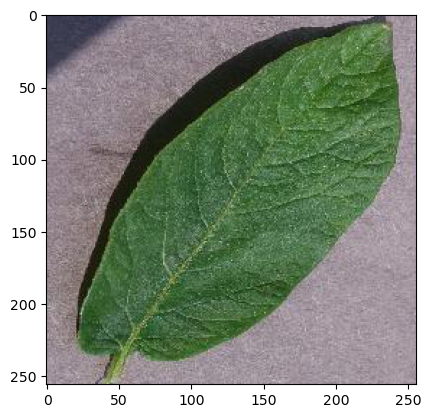

In [208]:
for folder in os.listdir(train_path):
    sub_path = train_path + "/" + folder
    
    print(folder)
    for i in range(2):
        temp_path = os.listdir(sub_path)[i]
        temp_path = sub_path + "/" + temp_path
        img = mpimg.imread(temp_path)
        imgplot = plt.imshow(img)
        plt.show()

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4988 files belonging to 6 classes.


In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    val_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1664 files belonging to 6 classes.


In [211]:
def VGG19_sequential(input_shape=(128, 128, 3), num_classes=6,kernel_regularizer=None):
    model = tf.keras.Sequential([
        # Block 1
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1', input_shape=input_shape),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2'),
        tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'),

        # Block 2
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1'),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2'),
        tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'),

        # Block 3
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1'),
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2'),
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3'),
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv4'),
        tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'),

        # Block 4
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1'),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2'),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3'),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv4'),
        tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'),

        # Block 5
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1'),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2'),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3'),
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv4'),
        tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool'),

        # Fully connected layers
        tf.keras.layers.Flatten(name='flatten'),
        tf.keras.layers.Dense(4096, activation='relu', name='fc1', kernel_regularizer=kernel_regularizer),
        tf.keras.layers.Dropout(0.5),  # Add dropout for regularization
        tf.keras.layers.Dense(4096, activation='relu', name='fc2', kernel_regularizer=kernel_regularizer),
        tf.keras.layers.Dropout(0.5),  # Add dropout for regularization
        tf.keras.layers.Dense(num_classes, activation='softmax', name='predictions')
    ])
    
    return model

In [212]:
l2_regularizer = tf.keras.regularizers.l2(0.001)
model = VGG19_sequential(kernel_regularizer=l2_regularizer)

In [213]:
model.build(input_shape=(None, 128, 128, 3))  # Build the model with input shape
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 32, 32, 256)      

In [214]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [215]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
156/156 [==============================] - 2525s 16s/step - loss: 7.8273 - accuracy: 0.3378 - val_loss: 5.6539 - val_accuracy: 0.4020
Epoch 2/10
156/156 [==============================] - 2478s 16s/step - loss: 4.2319 - accuracy: 0.5890 - val_loss: 3.2794 - val_accuracy: 0.6779
Epoch 3/10
156/156 [==============================] - 2463s 16s/step - loss: 2.8117 - accuracy: 0.7201 - val_loss: 2.2789 - val_accuracy: 0.7963
Epoch 4/10
156/156 [==============================] - 2460s 16s/step - loss: 2.0385 - accuracy: 0.7921 - val_loss: 1.8431 - val_accuracy: 0.7909
Epoch 5/10
156/156 [==============================] - 2468s 16s/step - loss: 1.5825 - accuracy: 0.8346 - val_loss: 1.3685 - val_accuracy: 0.8498
Epoch 6/10
156/156 [==============================] - 2458s 16s/step - loss: 1.2637 - accuracy: 0.8538 - val_loss: 1.1555 - val_accuracy: 0.8618
Epoch 7/10
156/156 [==============================] - 2487s 16s/step - loss: 1.0156 - accuracy: 0.8805 - val_loss: 0.9579 - val_ac

In [216]:
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

156/156 [==============================] - 595s 4s/step - loss: 0.4483 - accuracy: 0.9673
Training accuracy: 0.9673215746879578


In [217]:
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

52/52 [==============================] - 200s 4s/step - loss: 0.5629 - accuracy: 0.9171
Validation accuracy: 0.917067289352417


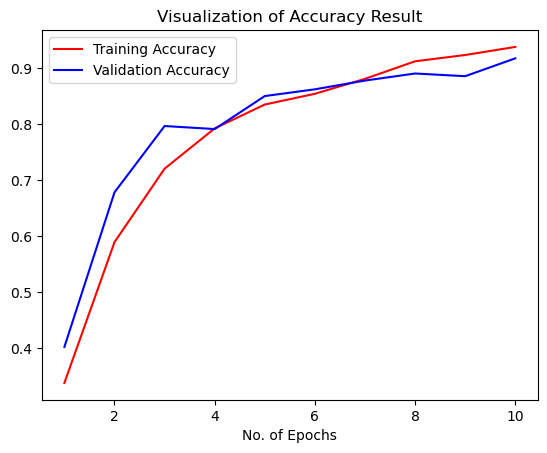

In [228]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

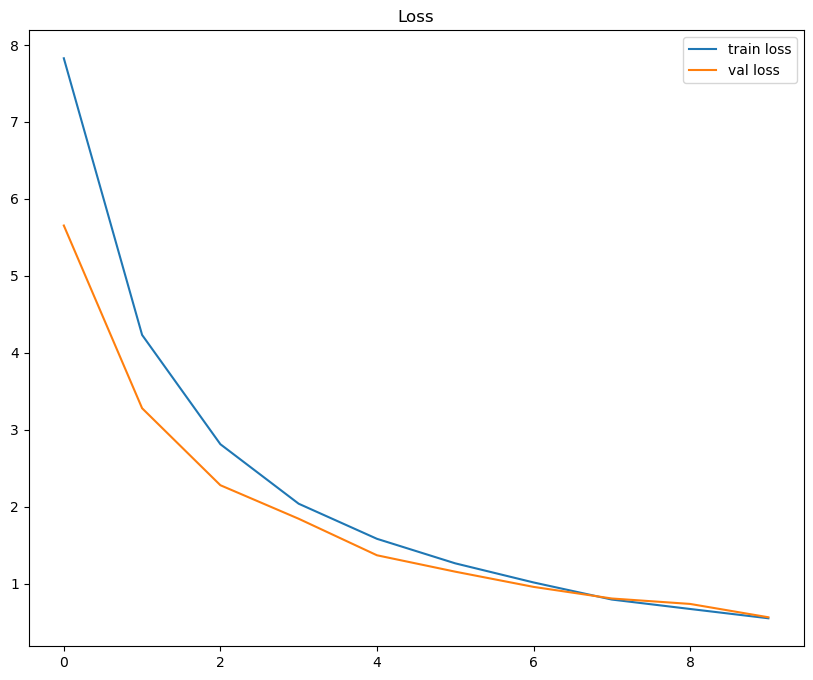

In [229]:
plt.figure(figsize=(10, 8))
plt.plot(training_history.history['loss'], label='train loss')
plt.plot(training_history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()

In [218]:
class_name = validation_set.class_names

In [219]:
test_set = tf.keras.utils.image_dataset_from_directory(
    val_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1664 files belonging to 6 classes.


In [220]:
class_name = validation_set.class_names
print(class_name)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']


In [221]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

1664/1664 [==============================] - 268s 161ms/step


In [222]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [223]:
Y_true

<tf.Tensor: shape=(1664,), dtype=int64, numpy=array([0, 0, 0, ..., 5, 5, 5])>

In [224]:
predicted_categories

<tf.Tensor: shape=(1664,), dtype=int64, numpy=array([0, 0, 0, ..., 5, 5, 5])>

In [225]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [226]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                       precision    recall  f1-score   support

Potato___Early_blight       0.97      0.96      0.96       250
 Potato___Late_blight       0.88      0.89      0.88       250
     Potato___healthy       0.75      0.95      0.84        38
  Tomato_Early_blight       0.86      0.81      0.83       250
   Tomato_Late_blight       0.89      0.91      0.90       478
       Tomato_healthy       1.00      0.98      0.99       398

             accuracy                           0.92      1664
            macro avg       0.89      0.92      0.90      1664
         weighted avg       0.92      0.92      0.92      1664



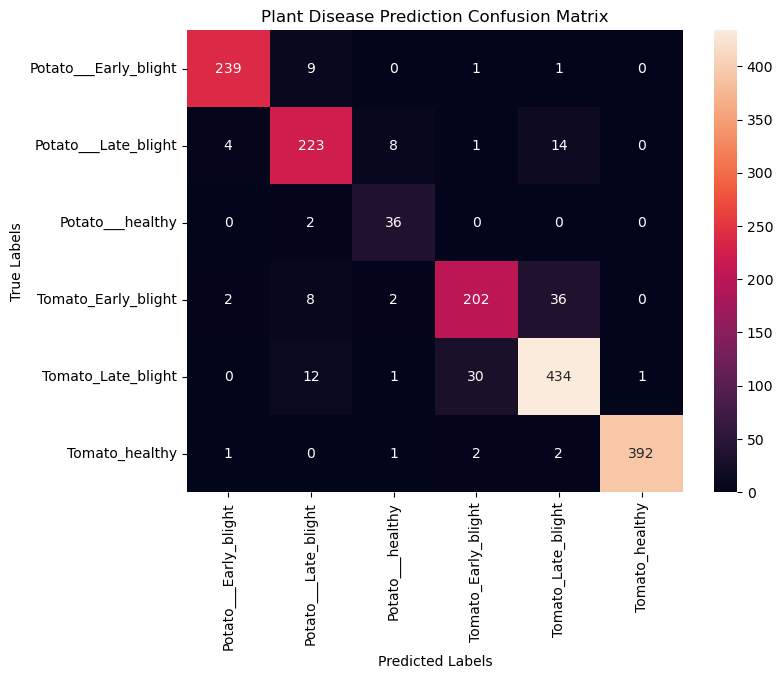

In [289]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=True,
            xticklabels=class_name, yticklabels=class_name)
plt.title('Plant Disease Prediction Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [230]:
model.save('vgg19model.keras')

In [231]:
training_history.history

{'loss': [7.82733154296875,
  4.231875419616699,
  2.811708450317383,
  2.038536548614502,
  1.5824530124664307,
  1.263721227645874,
  1.0155632495880127,
  0.7931023240089417,
  0.6707187294960022,
  0.5497816205024719],
 'accuracy': [0.337810754776001,
  0.5890136361122131,
  0.7201282978057861,
  0.7921010255813599,
  0.8346030712127686,
  0.8538492321968079,
  0.8805132508277893,
  0.911788284778595,
  0.9230152368545532,
  0.9374498724937439],
 'val_loss': [5.65385103225708,
  3.2793633937835693,
  2.278902769088745,
  1.8431282043457031,
  1.3685367107391357,
  1.155468463897705,
  0.9578769207000732,
  0.8068739175796509,
  0.7362711429595947,
  0.5628604292869568],
 'val_accuracy': [0.40204328298568726,
  0.6778846383094788,
  0.7962740659713745,
  0.7908653616905212,
  0.8497596383094788,
  0.8617788553237915,
  0.8774038553237915,
  0.8900240659713745,
  0.8852163553237915,
  0.917067289352417]}

In [232]:
import json
with open('vgg19_hist.json','w') as f:
  json.dump(training_history.history,f)

In [4]:
vgg = tf.keras.models.load_model('/Users/garvsawhney/Desktop/NEWMODEL/vgg19model.keras')

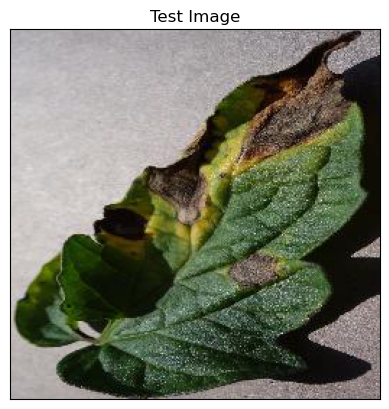

In [5]:
image_path = '/Users/garvsawhney/Downloads/PlantVillage(split)/val/Tomato_Early_blight/8a1d3598-cd1d-4978-9e18-b5e205108540___RS_Erly.B 8315.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [6]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = vgg.predict(input_arr)

1/1 [==============================] - 4s 4s/step


In [7]:
print(predictions)

[[5.9990573e-04 1.3768132e-03 2.2251003e-04 8.7086928e-01 1.2593774e-01
  9.9376030e-04]]


In [8]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

3


In [9]:
a = np.argmax(predictions[0])

In [10]:
confidence = (predictions[0][a] * 100)
confidence = f"{confidence:.2f}%"
confidence

'87.09%'

In [11]:
class_name = validation_set.class_names
print(class_name)

NameError: name 'validation_set' is not defined

In [12]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}\nConfidence: {confidence}")
plt.xticks([])
plt.yticks([])
plt.show()

NameError: name 'class_name' is not defined

In [76]:
#GRADCAM

In [22]:
def grad_cam(model, img_array, layer_name):
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        output_slice = predictions[:, class_idx]

    grads = tape.gradient(output_slice, conv_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_output_value = conv_output[0]
    heatmap = tf.reduce_mean(tf.multiply(conv_output_value, pooled_grads), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    return heatmap

In [23]:
newimg = cv2.imread('/Users/garvsawhney/Downloads/PlantVillage(split)/val/Potato___Early_blight/ecf9d01d-b97f-4cf8-99e5-7036bd91b5d1___RS_Early.B 8650.JPG')
newimg = cv2.resize(newimg, (128, 128))
newimg_array = np.expand_dims(newimg, axis=0)
newimg_array = newimg_array.astype('float32') / 255

In [24]:
predicted_class = np.argmax(vgg.predict(newimg_array)[0])

1/1 [==============================] - 0s 207ms/step


In [25]:
gradcam = grad_cam(vgg, newimg_array, "block5_conv4")

In [26]:
heatmap = cv2.resize(gradcam, (newimg.shape[1], newimg.shape[0]))

In [27]:
heatmap_resized = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

heatmap_rescaled = np.uint8(255 * heatmap_resized)

heatmap_overlay = cv2.applyColorMap(heatmap_rescaled, cv2.COLORMAP_JET)

alpha = 0.5 
superimposed_img = cv2.addWeighted(img, alpha, heatmap_overlay, 1 - alpha, 0)

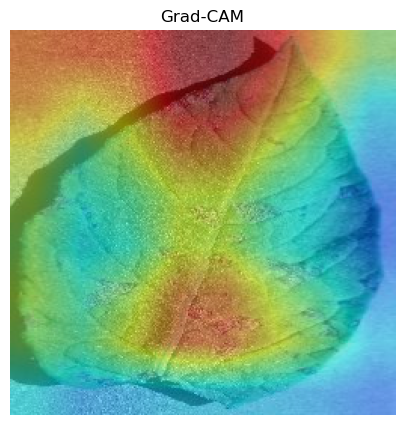

In [28]:
plt.figure(figsize=(10, 5))
plt.imshow(superimposed_img[:, :, ::-1])
plt.axis('off')
plt.title('Grad-CAM')
plt.show()